<a href="https://colab.research.google.com/github/RodolfoFerro/psychologist-assistant/blob/master/data/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration

The dataset used for this project is the one published in the "[Challenges in Representation Learning: Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)" by Kaggle.

> **"Challenges in Representation Learning: A report on three machine learning contests."** I. Goodfellow, D. Erhan, P. L. Carrier, A. Courville, M. Mirza, B. Hamner, W. Cukierski, Y. Tang, D. H. Lee, Y. Zhou, C. Ramaiah, F. Feng, R. Li, X. Wang, D. Athanasakis, J. Shawe-Taylor, M. Milakov, J. Park, R. Ionescu, M. Popescu, C. Grozea, J. Bergstra, J. Xie, L. Romaszko, B. Xu, Z. Chuang, and Y. Bengio. arXiv 2013.

### Data description (as detailed by Kaggle)

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

The csv file contains two main columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project. They have graciously provided the workshop organizers with a preliminary version of their dataset to use for this contest.

## Getting the data 

We can directly download the dataset from Kaggle using the Kaggle API:

In [0]:
# Update Kaggle API:
!pip install --upgrade -q kaggle

# Create a new folder for Kaggle config file:
!mkdir /root/.kaggle

In [0]:
import json

token = {
    "username": "rodolfoferro",
    "key": "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)

In [0]:
# Provide access to Kaggle config file:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 2.68MB/s]
 96% 88.0M/92.0M [00:01<00:00, 39.6MB/s]
100% 92.0M/92.0M [00:01<00:00, 68.0MB/s]


We can now proceed to extract our dataset from the compressed file.

In [5]:
!tar -xvf "fer2013.tar.gz"

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/


Once the files are extracted, we can proceed to explore the dataset.

## Exploring the dataset

We are going to use the Pandas Python library in order to explore a bit the structure of the dataset and its contents.


First of all we load our dataset and print the head of it.

In [6]:
import pandas as pd

df = pd.read_csv('fer2013/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


We can also get a general description of the dataset:

In [7]:
df.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


An interesting thing that happens is that this dataset has images used for three different purposes:

- Training
- Private testing
- Public testing

In [8]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

We need to access the data information from the dataframe so we can iterate later for each element.

In [9]:
# Set image index:
img_index = 2
ith_face = df[['pixels']].iloc[img_index]
ith_face = ith_face.values[0]
ith_face

'231 212 156 164 174 138 161 173 182 200 106 38 39 74 138 161 164 179 190 201 210 216 220 224 222 218 216 213 217 220 220 218 217 212 174 160 162 160 139 135 137 131 94 56 36 44 27 16 229 175 148 173 154 151 171 172 183 101 23 25 67 127 164 170 171 182 199 212 219 220 224 226 226 226 226 226 227 227 228 225 221 217 202 174 158 155 145 126 126 129 99 70 37 27 35 27 214 156 157 168 153 172 168 175 100 16 8 47 117 169 175 175 183 194 204 214 218 223 225 227 228 226 229 231 232 232 229 227 225 224 217 198 174 154 134 110 97 115 96 69 52 28 22 28 202 153 166 156 164 166 170 116 26 2 21 90 165 180 180 181 192 206 210 213 216 220 224 224 226 224 228 227 227 228 231 229 225 228 226 218 196 168 148 111 80 89 97 56 50 38 26 23 190 163 167 156 168 172 136 36 0 24 69 146 180 179 183 196 204 211 214 215 214 217 218 217 220 223 220 220 222 224 227 229 228 228 228 227 216 187 156 125 92 62 83 61 44 46 31 31 181 173 156 167 176 159 61 0 8 62 121 175 185 188 197 210 215 222 225 221 216 214 214 214 213 

If we want to load a specific picture, we are going to convert the data string into a Numpy array in order to plot it using matplotlib.

In [10]:
import numpy as np

data = np.fromstring(ith_face, dtype=int, sep=' ')
data = np.reshape(data, (48, 48))
data

array([[231, 212, 156, ...,  44,  27,  16],
       [229, 175, 148, ...,  27,  35,  27],
       [214, 156, 157, ...,  28,  22,  28],
       ...,
       [241, 245, 250, ...,  57, 101, 146],
       [246, 250, 252, ...,  78, 105, 162],
       [250, 251, 250, ...,  88, 110, 152]])

Now we are able to plot the loaded image:

(-0.5, 47.5, 47.5, -0.5)

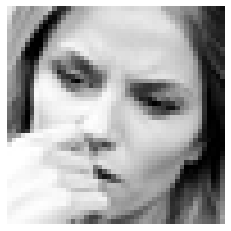

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.imshow(data, cmap='gray')
plt.axis('off')

## Packing functionality

Now that we have explored a bit the dataset and we are able to load a single image, we proceed to create functions that will allow us to load the full dataset as numpy arrays in order to feed a neural network.

In [0]:
def load_dataset():
    """Utility function to load the FER2013 dataset.
    
    It returns the formated tuples (X_train, y_train) , (X_test, y_test).
    """

    # Load and filter in Training/not Training data:
    df = pd.read_csv('fer2013/fer2013.csv')
    training = df.loc[df['Usage'] == 'Training']
    testing = df.loc[df['Usage'] != 'Training']

    # X_train values:
    X_train = training[['pixels']].values
    X_train = [np.fromstring(item[0], dtype=int, sep=' ') for item in X_train]
    X_train = [item.reshape((48, 48)) for item in X_train]
    X_train = np.array(X_train)

    # X_test values:
    X_test = testing[['pixels']].values
    X_test = [np.fromstring(item[0], dtype=int, sep=' ') for item in X_test]
    X_test = [item.reshape((48, 48)) for item in X_test]
    X_test = np.array(X_test)

    # y_train, y_test values:
    y_train = training[['emotion']].values
    y_test = testing[['emotion']].values

    return (X_train, y_train) , (X_test, y_test)

We can now directly load the complete dataset splitted into training and testing data.

In [0]:
(X_train, y_train) , (X_test, y_test) = load_dataset()

This dataset loading is consistent so we can use images directly:

(-0.5, 47.5, 47.5, -0.5)

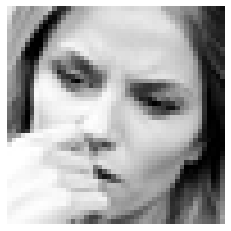

In [14]:
plt.imshow(X_train[2], cmap='gray')
plt.axis('off')